# Figure 4: Peaks in high-quality samples exhibit greater significant SNP-heritability for relevant phenotypes.

In [6]:
# Import basic stuffs

import os, sys, re, glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ch218391/program/miniforge3/envs/scatac/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [7]:
# Load Basic analytic data for gkmQC paper
# exec(open("../scripts/__scratch__basic_import.py").read())

import pickle

### ENCODE & roadmap info
## All ENCODE metadata
print("Load ENCODE metadata table")
encode_df = pd.read_table("../data/encode_metadata_info_latest.txt", index_col="acc_peak")

# Load sample id sample types dictionary
f = open("../data/sid_stype_dic.pkl", "rb")
sid_stype_dic = pickle.load(f)
f.close()
encode_df.loc[:, "sample_abbr"] = encode_df["acc_sample"].map(sid_stype_dic)
#for param, analysis_dict in zip(param_list, analysis_dict_list):
#    encode_df.loc[:,param] = encode_df.index.map(analysis_dict)

## ENTEx tissue info data
print("Load ENTEx tissue-quality mapping")
entex_df = pd.read_table("../data/entx_tissue_info.txt", index_col="fid")

Load ENCODE metadata table
Load ENTEx tissue-quality mapping


## Basic parameters
(1) dAUC, SPOT2, peak/read counts, m-value

In [8]:
import pickle, requests, json
headers = {'accept': 'application/json'}

## SPOT2 scores
spot2_dic_pkl_file = "../data/prefix_spot2_dic.pkl"
f = open(spot2_dic_pkl_file, "rb")
prefix_spot2_dic = pickle.load(f)
f.close()

# Read counts
readc_dic_pkl_file = "../data/prefix_readc_dic.pkl"
f = open(readc_dic_pkl_file, "rb")
prefix_readc_dic = pickle.load(f)
f.close()

# peak count dic
prefix_pcount_dic_pkl = "../data/prefix_pcount_dic.pkl"
f = open(prefix_pcount_dic_pkl, "rb")
prefix_pcount_dic = pickle.load(f)
f.close()
    
# peak specificity
f = open("../data/prefix_ps_dic.pkl", "rb")
prefix_ps_dic = pickle.load(f)
f.close()
    
# dAUC
prefix_dauc_dic_pkl = "../data/prefix_dauc_dic.pkl"
f = open(prefix_dauc_dic_pkl, "rb")
prefix_dauc_dic = pickle.load(f)
f.close()
    
# new gkmQC
# score1 = (1 - auc_min/auc_max) / n
# score2 = (auc_max ** 2 - auc_min ** 2) / n
# score3 = (auc_max - auc_min) / ((auc_max + auc_min) * n)
# score4 = ((auc_max + auc_min) / 2 * n) / (auc_max - auc_min)
# score5 = sum(auc_scores) / (auc_max - auc_min)

prefix_gkmqc_dic_pkl = "../data/prefix_gkmqc_dic.pkl"
f = open(prefix_gkmqc_dic_pkl, "rb")
prefix_gkmqc_dic = pickle.load(f)
f.close()

## Mapping samples - traits relationships:
(1) Samples ID and GWAS traits

In [9]:
## Samples ID
brief_infos = ["acc_bam", "sample_desc", "submit_lab", "project_info", "gkmQC", "FRiP_peak", "FRiP_enhancer"]
sample_dic = {}

# tissue
tissues_heart = ["ENCFF225UJM", "ENCFF892RWC", "ENCFF850WOE", "ENCFF149IGI", "ENCFF532UXX", "ENCFF146VYU"]
sample_dic["tissues_heart"] = tissues_heart
tissues_artery = ["ENCFF178BNR", "ENCFF822UQG", "ENCFF048ZGK", "ENCFF601CWS", "ENCFF620ZPK", "ENCFF784MWD", "ENCFF406DTA"]
sample_dic["tissues_artery"] = tissues_artery
tissues_skmuscle = ["ENCFF217FCM", "ENCFF606KOP", "ENCFF488OAJ", "ENCFF370NBX", "ENCFF942ULR", "ENCFF463JAI", "ENCFF461UHI"]
sample_dic["tissues_skmuscle"] = tissues_skmuscle
tissues_pancreas = ["ENCFF535LEW", "ENCFF398ENA", "ENCFF906AHJ", "ENCFF522EWH", "ENCFF894HSB", "ENCFF857WRP", "ENCFF032ZRJ", "ENCFF229BAI"]
sample_dic["tissues_pancreas"] = tissues_pancreas
tissues_brain = ["ENCFF017TAW", "ENCFF240ECT", "ENCFF337NAS", "ENCFF053XFC", "ENCFF732MQW", "ENCFF966DRW", "ENCFF611EHQ", "ENCFF631HBT", "ENCFF855HES", "ENCFF255NTQ", "ENCFF455NZK", "ENCFF397GLL", "ENCFF881WHO", "ENCFF270JMS", "ENCFF356BZZ", "ENCFF700GWK", "ENCFF052FFY", "ENCFF918ILU", "ENCFF285MQS", "ENCFF662SZI", "ENCFF937DVO", "ENCFF026XWM", "ENCFF359LBG"]
sample_dic["tissues_brain"] = tissues_brain
tissues_adrenal = ["ENCFF977OWF", "ENCFF350XGZ", "ENCFF335CNN", "ENCFF654WWP", "ENCFF721ZHK"]
sample_dic["tissues_adrenal"] = tissues_adrenal

# embryos
embryos_heart = ["ENCFF262FPE", "ENCFF790KEZ", "ENCFF265DAD", "ENCFF015SFI", "ENCFF911WSI", "ENCFF617LBQ", "ENCFF532OGD", "ENCFF115PGQ", "ENCFF123DFX", "ENCFF820RVX", "ENCFF176BHG", "ENCFF025GJZ", "ENCFF794SOC", "ENCFF855YGO", "ENCFF778BRJ", "ENCFF642WZB", "ENCFF297IRX", "ENCFF166HST", "ENCFF784CGB", "ENCFF993JHG", "ENCFF207NXB", "ENCFF289IMF", "ENCFF172XNI", "ENCFF709LRW", "ENCFF031SHA"]
sample_dic["embryos_heart"] = embryos_heart
embryos_lung = ["ENCFF588WQL", "ENCFF671CWO", "ENCFF484YOE", "ENCFF944FSO", "ENCFF690UKD", "ENCFF353SVP", "ENCFF439ZRL", "ENCFF676GRC", "ENCFF642HTL", "ENCFF601TZC", "ENCFF318TOW", "ENCFF929FIK", "ENCFF978OUM", "ENCFF348CJE", "ENCFF363XQF", "ENCFF115HTH", "ENCFF148PHO", "ENCFF913NRZ", "ENCFF909JGU", "ENCFF422YFH", "ENCFF679QGU", "ENCFF889NTH", "ENCFF962JWU", "ENCFF992VNB", "ENCFF811RTH", "ENCFF395KUT", "ENCFF024SOP", "ENCFF628MPB", "ENCFF281HKU", "ENCFF586UYY", "ENCFF157KGS", "ENCFF785ORF", "ENCFF352RNR", "ENCFF796WDQ", "ENCFF941EJJ", "ENCFF516FXF", "ENCFF277WMS", "ENCFF604AQG", "ENCFF796EIB"]
sample_dic["embryos_lung"] = embryos_lung
embryos_kidney = ["ENCFF153WQN", "ENCFF183AEI", "ENCFF578BEO", "ENCFF812GJU", "ENCFF765BJR", "ENCFF036JUB", "ENCFF484XHW", "ENCFF270GNM", "ENCFF402THI", "ENCFF305WVB", "ENCFF932ATD", "ENCFF916NTG", "ENCFF845VOI", "ENCFF418BQS", "ENCFF579PHD", "ENCFF281XUZ", "ENCFF018UIV", "ENCFF787FBC", "ENCFF973CLH", "ENCFF292LZY", "ENCFF804HVH", "ENCFF003GPD", "ENCFF603QCZ", "ENCFF870ASQ", "ENCFF426FAC", "ENCFF929WJR", "ENCFF137EPX", "ENCFF717QSC", "ENCFF727HFV", "ENCFF416QZR", "ENCFF047CHH", "ENCFF682RBA", "ENCFF246POE", "ENCFF871EKB", "ENCFF262FHU"]
sample_dic["embryos_kidney"] = embryos_kidney
embryos_brain = ["ENCFF301ARM", "ENCFF018ATG", "ENCFF936VAD", "ENCFF617UGK", "ENCFF693LCL", "ENCFF666HLW", "ENCFF491PPP", "ENCFF819SKB", "ENCFF968JTF", "ENCFF098XHW", "ENCFF855BFG", "ENCFF549EGS", "ENCFF420FYX", "ENCFF286XIL", "ENCFF999XYV", "ENCFF611KEX"]
sample_dic["embryos_brain"] = embryos_brain
embryos_spcord = ["ENCFF747RZI", "ENCFF186BIW", "ENCFF279CTV", "ENCFF639XZY", "ENCFF521DDI", "ENCFF109ERC"]
sample_dic["embryos_spcord"] = embryos_spcord
embryos_thymus = ["ENCFF186QHO", "ENCFF748AYU", "ENCFF417APA", "ENCFF295VYO", "ENCFF269TPT", "ENCFF945ILS", "ENCFF633GQX", "ENCFF992AXG", "ENCFF221AJA"]
sample_dic["embryos_thymus"] = embryos_thymus
embryos_renal = ["ENCFF607HSK", "ENCFF770BXK", "ENCFF418EPC", "ENCFF629UPF", "ENCFF795QUJ", "ENCFF233MJO", "ENCFF863LIV", "ENCFF983MXB", "ENCFF413NZU", "ENCFF035RNU", "ENCFF160NEE", "ENCFF040UAE", "ENCFF883JEC", "ENCFF906SBI"]
sample_dic["embryos_renal"] = embryos_renal
embryos_adrenal = ["ENCFF042VKK", "ENCFF688ZWO", "ENCFF675UKK", "ENCFF367BEU", "ENCFF217MXO", "ENCFF315CSH", "ENCFF085NOG"]
sample_dic["embryos_adrenal"] = embryos_adrenal
embryos_eye = ["ENCFF226NAB", "ENCFF546ZMB", "ENCFF256RVA", "ENCFF471KBD", "ENCFF301HUB", "ENCFF380LAI", "ENCFF911LSM", "ENCFF070NZJ"]
sample_dic["embryos_eye"] = embryos_eye
embryos_intestine = ["ENCFF412ATV", "ENCFF087XDG", "ENCFF274NTF", "ENCFF130CZB", "ENCFF424PWV", "ENCFF019PSW", "ENCFF720DUQ", "ENCFF333MTL", "ENCFF758VXS", "ENCFF617TGM", "ENCFF885IBS", "ENCFF571UWP"]
sample_dic["embryos_intestine"] = embryos_intestine
embryos_skmuscle = ["ENCFF040WPR", "ENCFF771EKC", "ENCFF041NEG", "ENCFF755PMB", "ENCFF475YRW", "ENCFF886DDL", "ENCFF246TUN", "ENCFF349CIP", "ENCFF308QRZ", "ENCFF028CVN", "ENCFF229KSL", "ENCFF262NZB", "ENCFF994YDK", "ENCFF615LEO", "ENCFF334ENU", "ENCFF213IAV", "ENCFF191MBC", "ENCFF897TZA", "ENCFF016PCJ", "ENCFF182YXK", "ENCFF735DNU", "ENCFF433VTN", "ENCFF376WVL", "ENCFF994ALS", "ENCFF758REB", "ENCFF468TOZ", "ENCFF062LJL", "ENCFF417IJL", "ENCFF831RQP", "ENCFF766PCO", "ENCFF365RKF", "ENCFF067VHZ", "ENCFF011UBS", "ENCFF896ZUQ", "ENCFF470XXM", "ENCFF241QSX", "ENCFF283UJD", "ENCFF175BCP", "ENCFF031RMC", "ENCFF699XQF", "ENCFF138LZU", "ENCFF058UNN", "ENCFF383OJO", "ENCFF022UVJ", "ENCFF443ZJX", "ENCFF036PYG", "ENCFF970QZI", "ENCFF874GGX"]
sample_dic["embryos_skmuscle"] = embryos_skmuscle

# primary cells
cells_monocytes = ["ENCFF581KXE", "ENCFF203EKC", "ENCFF159CSX", "ENCFF438EZP", "ENCFF154TFX", "ENCFF860NPB"]
sample_dic["cells_monocytes"] = cells_monocytes
cells_cmp = ["ENCFF901XRC", "ENCFF925OKW", "ENCFF066XNH", "ENCFF846OZD", "ENCFF099SSL", "ENCFF333XKC", "ENCFF919FUV", "ENCFF618BFP", "ENCFF365CRQ", "ENCFF510UYU", "ENCFF612FUV", "ENCFF111XGH", "ENCFF874PJV"]
sample_dic["cells_cmp"] = cells_cmp
cells_hmp = ["ENCFF273EMN", "ENCFF909FSV", "ENCFF515CNP", "ENCFF172KLG", "ENCFF375IIZ", "ENCFF591QXD", "ENCFF774ZSC", "ENCFF841LEO", "ENCFF901KPG", "ENCFF503FDQ", "ENCFF520GUH", "ENCFF746FEH", "ENCFF785CWE", "ENCFF595NXS", "ENCFF535RIZ", "ENCFF062XSO", "ENCFF125KHG", "ENCFF060IWI", "ENCFF573OMB", "ENCFF283CFW", "ENCFF963VPW", "ENCFF626VVB"]
sample_dic["cells_hmp"] = cells_hmp

## GWAS traits
gwas_df = pd.read_table("../data/UKBB_GWAS_stats.txt", index_col="description")
f = open("../data/summarized_traits_ukbb.txt")
traits_list = list(map(lambda x: x.strip(), f.readlines()))
traits = set(traits_list)
f.close()

## Figure 4A
A scatter plot comparing dAUC and normalized S-LDSC coefficient (z-score) for eGFR is shown for 35 developing-kidney samples. The S-LDSC coefficient is directly correlated with the enrichment score of SNP-heritability of eGFR. 

eGFR
ENCFF153WQN 48.13488829345446 1.3820767306266282
ENCFF183AEI 76.08274292915883 1.6624959429367867
ENCFF578BEO 81.4061046353958 2.5566805233652503
ENCFF812GJU 92.69057562646975 3.5479170459819414
ENCFF765BJR 64.09457597145233 0.3984214128170527
ENCFF036JUB 74.0952902600232 1.090566622385826
ENCFF484XHW 81.64025729944667 1.500180749588451
ENCFF270GNM 60.487604967665106 -0.48046244872423305
ENCFF402THI 72.58363866958759 2.446837797126766
ENCFF305WVB 79.05263729062258 1.635060595117864
ENCFF932ATD 43.147250651010154 -1.7233516157980204
ENCFF916NTG 28.38733035536922 -1.656133878350177
ENCFF845VOI 85.29911743750215 2.1065849661960474
ENCFF418BQS 48.69543092423336 -2.4146518420189764
ENCFF579PHD 44.91450257682123 -0.8185353993106776
ENCFF281XUZ 42.66176304719807 -1.1126899664842675
ENCFF018UIV 49.79102303975255 -0.15732136799785762
ENCFF787FBC 87.92498517821518 1.487189864206975
ENCFF973CLH 79.69154529501738 1.0434237730241631
ENCFF292LZY 79.5453145701578 0.9887228043580807
ENCFF804HVH 9

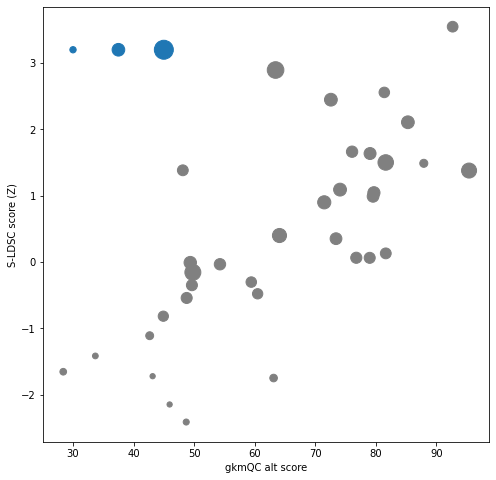

In [25]:
from textwrap import wrap
from scipy.stats import pearsonr, spearmanr

mat_u = []
mat_p = []

stype = "embryos_kidney"
index = "eGFR"
sumstat_file = gwas_df.loc[index]['ldsc_sumstat_file']
stype_list = gwas_df.loc[index]['Comments and investigations'].split(',')
pheno = index
samples = sample_dic[stype]

x_list = []
y1_list = []
y2_list = []
y3_list = []
z_list = []

print(pheno)
sfactor = 10
for sample in samples:
    acc_bam = encode_df.loc[sample, "acc_bam"]
    try:
        data_list1 = open("/home/ch218391/PROJECTS/ldsc_pipeline/analysis/ldsc_baseLD22.%s.%s.results" % (sample, sumstat_file)).readlines()[-1].split()
    except:
        continue

    # HOTSPOT2
    peak_counts_hotspot = prefix_pcount_dic[sample]
    alter_hotspot_score = prefix_gkmqc_dic[sample][4]
    enric_hotspot_score = float(data_list1[4]) # enrichment
    herit_hotspot_score = -1.0 * np.log10(float(data_list1[6])) # -log10P
    heriz_hotspot_score = float(data_list1[9]) # z-score

    #x_list.append(gkmqn_hotspot_score)
    x_list.append(alter_hotspot_score)
    y1_list.append(heriz_hotspot_score)
    y3_list.append(enric_hotspot_score ** 2 * sfactor)
    
    print(sample, alter_hotspot_score, heriz_hotspot_score)

plt.figure(figsize=(8, 8))
#scatter(x_list, y1_list, s=y3_list, c=z_list, cmap='cividis')
scatter(x_list, y1_list, s=y3_list, c="grey")
xlabel("gkmQC alt score")
ylabel("S-LDSC score (Z)")
#clim(0, 200000)
#colorbar()
sfactor = 10
scatter([30, 37.5, 45], [3.2, 3.2, 3.2], s=[4 * sfactor, 16 * sfactor, 36 * sfactor])
plt.savefig("../output/Figure_4A.pdf")
print(spearmanr(x_list, y1_list))

## Figure 4B
Two heatmaps comparing the average S-LDSC coefficients between high- and low-quality samples.

eGFR	BUN	UACR	Urea (mmol/L)	Heel bone mineral density (BMD) T-score, automated	Fluid intelligence score	Year ended full time education	Bipolar disorder	Schizophrenia	Autisum disorder	Forced vital capacity (FVC)	Forced expiratory volume in 1-second (FEV1)	Peak expiratory flow (PEF)	Diastolic blood pressure, automated reading	Systolic blood pressure, automated reading	Pulse rate	Red blood cell (erythrocyte) count	Haemoglobin concentration	Haematocrit percentage	Mean corpuscular haemoglobin concentration	Red blood cell (erythrocyte) distribution width	White blood cell (leukocyte) count	Lymphocyte count	Neutrophill count	Eosinophill count	Immature reticulocyte fraction	Monocyte count	Age hay fever, rhinitis or eczema diagnosed	diagnosed by doctor: Asthma	diagnosed by doctor: Hayfever, allergic rhinitis or eczema	

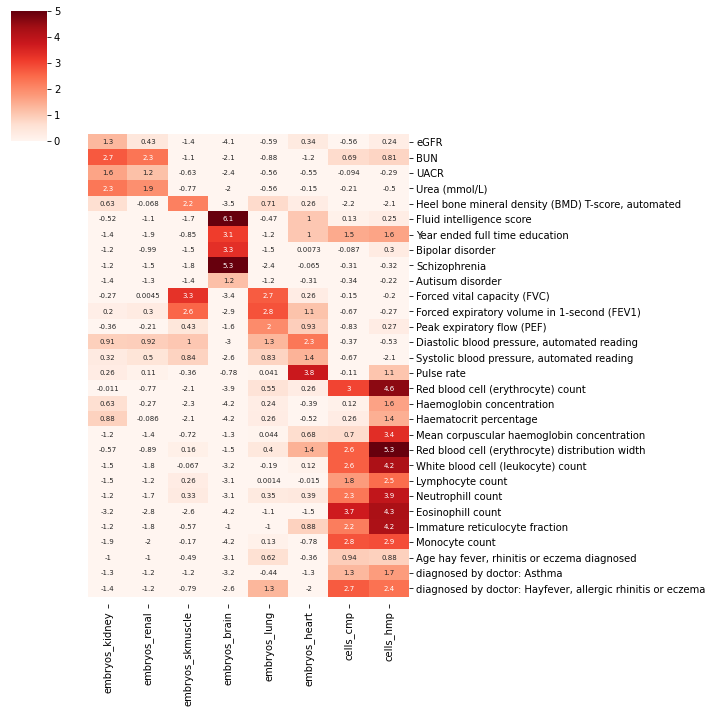

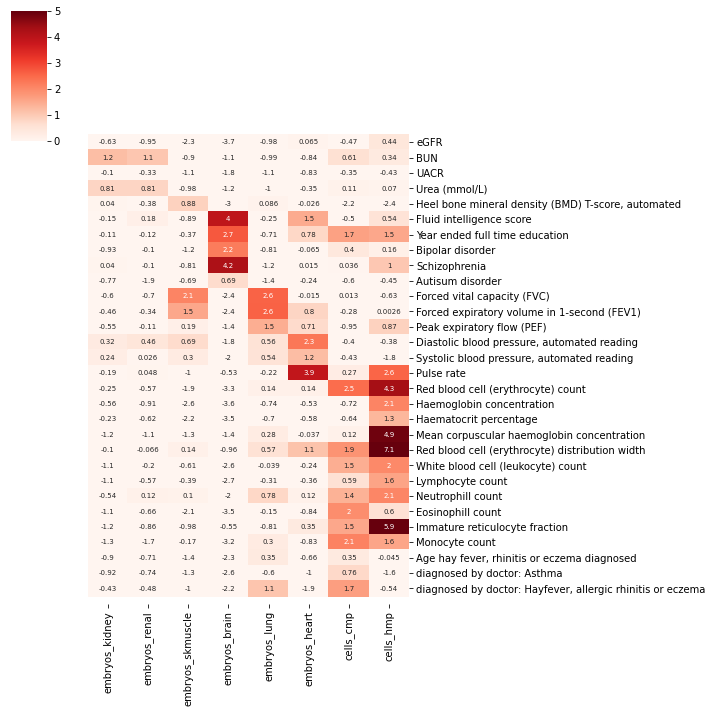

In [16]:
from textwrap import wrap
from scipy.stats import pearsonr

mat_u = []
mat_p = []
for index in traits_list:
    sumstat_file = gwas_df.loc[index]['ldsc_sumstat_file']
    stype_list = gwas_df.loc[index]['Comments and investigations'].split(',')
    pheno = index
    #if len(set.intersection(set(stype_list), set(target_stypes))) == 0:
    #    continue
    
    mat_u_sub = []
    mat_p_sub = []
    
    #print(pheno, end='\t')
    for stype in target_stypes:
        samples = sample_dic[stype]
        x_list = []
        y_list = []
        for sample in samples:
            acc_bam = encode_df.loc[sample, "acc_bam"]
            try:
                data_list1 = open("/home/ch218391/PROJECTS/ldsc_pipeline/analysis/ldsc_baseLD22.%s.%s.results" % (sample, sumstat_file)).readlines()[-1].split()
            except:
                continue
            
            # HOTSPOT2
            peak_counts_hotspot = prefix_pcount_dic[sample]
            gkmqc_hotspot_score = prefix_gkmqc_dic[sample][4]
            enric_hotspot_score = float(data_list1[4]) # enrichment
            herit_hotspot_score = -1.0 * np.log10(float(data_list1[6])) # -log10P
            heriz_hotspot_score = float(data_list1[9]) # z-score
            
            x_list.append(gkmqc_hotspot_score)
            y_list.append(heriz_hotspot_score)
        
        xy_list = sorted(zip(x_list, y_list), key=lambda x: x[0])
        
        #xy_list_u = list(filter(lambda x: x[0] <= coff, xy_list))
        xy_list_u = list(xy_list)[int(len(xy_list)/2):]
        
        #xy_list_p = list(filter(lambda x: x[0] > coff, xy_list))
        xy_list_p = list(xy_list)[:int(len(xy_list)/2)]
        
        herit_avg_u = np.nanmean(list(map(lambda x: x[1], xy_list_u)))
        herit_avg_p = np.nanmean(list(map(lambda x: x[1], xy_list_p)))
        
        mat_u_sub.append(herit_avg_u)
        mat_p_sub.append(herit_avg_p)
        
    mat_u.append(mat_u_sub)
    mat_p.append(mat_p_sub)

corr_u = pd.DataFrame(np.matrix(mat_u), index=traits_list, columns=target_stypes)
r = sns.clustermap(corr_u, annot=True, cmap="Reds", annot_kws={"size": 7}, vmin=0, vmax=5.0, row_cluster=False, col_cluster=False)
b, t = r.ax_heatmap.get_ylim()
b += 0.5
t -= 0.5
dum = r.ax_heatmap.set_ylim(b, t)
#plt.show()
plt.savefig("../output/Figure_4B_HQ.pdf")

corr_p = pd.DataFrame(np.matrix(mat_p), index=traits_list, columns=target_stypes)
r = sns.clustermap(corr_p, annot=True, cmap="Reds", annot_kws={"size": 7}, vmin=0, vmax=5.0, row_cluster=False, col_cluster=False)
b, t = r.ax_heatmap.get_ylim()
b += 0.5
t -= 0.5
dum = r.ax_heatmap.set_ylim(b, t)
#plt.show()
plt.savefig("../output/Figure_4B_LQ.pdf")

## Figure S5
Correlation analyses of gkmQC dAUC and S-LDSC coefficients for 48 pairs of relevant tissues and phenotypes (2 pages).

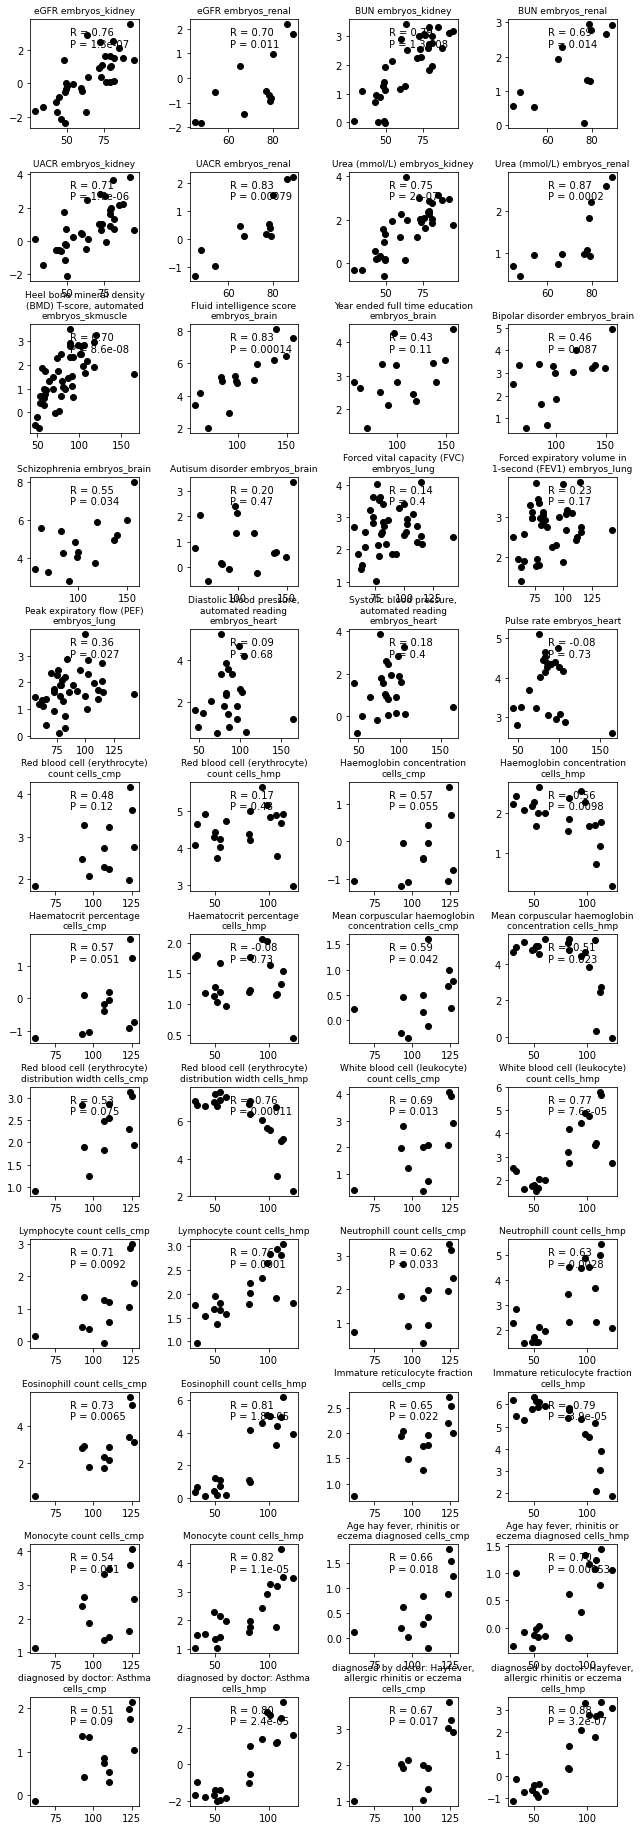

In [22]:
from textwrap import wrap
from scipy.stats import pearsonr, spearmanr
n = 0
target_stypes = ["embryos_kidney", "embryos_renal", "embryos_skmuscle", "embryos_brain", "embryos_lung", "embryos_heart", "cells_cmp", "cells_hmp"]

for index in traits:
    stype_list = gwas_df.loc[index]['Comments and investigations'].split(',')
    if len(set.intersection(set(stype_list), set(target_stypes))) == 0:
        continue
    for stype in set.intersection(set(stype_list), set(target_stypes)):        
        n += 1
        
n_rows = int(n / 4)
fig, ax = plt.subplots(nrows=n_rows, ncols=4, figsize=(9, 3 * n_rows))
k = 0

for index in traits_list:
    sumstat_file = gwas_df.loc[index]['ldsc_sumstat_file']
    stype_list = gwas_df.loc[index]['Comments and investigations'].split(',')
    pheno = index
    if len(set.intersection(set(stype_list), set(target_stypes))) == 0:
        continue
    for stype in set.intersection(set(stype_list), set(target_stypes)):
        i = int(k / 4)
        j = k % 4
        samples = sample_dic[stype]
        x_list = []
        y_list = []
        for sample in samples:
            # HOTSPOT2
            try:
                data_list1 = open("/home/ch218391/PROJECTS/ldsc_pipeline/analysis/ldsc_baseLD22.%s.%s.results" % (sample, sumstat_file)).readlines()[-1].split()
                gkmqc_hotspot_score = prefix_gkmqc_dic[sample][4]
                enric_hotspot_score = float(data_list1[4]) # enrichment
                herit_hotspot_score = -1.0 * np.log10(float(data_list1[6])) # -log10P
                heriz_hotspot_score = float(data_list1[9]) # z-score
            except:
                continue
            
            x_list.append(gkmqc_hotspot_score)
            y_list.append(heriz_hotspot_score)

        plt.sca(ax[i][j])
        ax[i][j].set_title("\n".join(wrap(pheno + '\n' + stype, 30)), fontsize=9)
        ax[i][j].scatter(x_list, y_list, color="black")
        
        plt.annotate("R = %.2f\nP = %.2g" % spearmanr(x_list, y_list), xy=(0, 1), xycoords='axes fraction',
                     xytext=(40, -8), textcoords='offset points', ha='left', va='top')
        k += 1
        
plt.tight_layout()
plt.subplots_adjust(top=0.7)
plt.savefig("../output/Figure_S5.pdf")

## Figure S6A
Contribution of tissue-specific peaks in high-quality samples to relevant traits. (a) Boxplots show distributions of S-LDSC coefficients of high- and low-quality samples paired with relevant/non-relevant traits.

In [15]:
prefix_rt_sldsc_dic = {}
prefix_nt_sldsc_dic = {}

target_stypes = ["embryos_kidney", "embryos_renal", "embryos_skmuscle", "embryos_brain", "embryos_lung", "embryos_heart", "cells_cmp", "cells_hmp"]
for index in traits:
    sumstat_file = gwas_df.loc[index]['ldsc_sumstat_file']
    stype_list = gwas_df.loc[index]['Comments and investigations'].split(',')
    pheno = index
    for stype in target_stypes:
        if stype in stype_list: target_dic = prefix_rt_sldsc_dic
        else: target_dic = prefix_nt_sldsc_dic
            
        samples = sample_dic[stype]
        for sample in samples:
            # HOTSPOT2
            try:
                data_list1 = open("/home/ch218391/PROJECTS/ldsc_pipeline/analysis/ldsc_baseLD22.%s.%s.results" % (sample, sumstat_file)).readlines()[-1].split()
                gkmqc_hotspot_score = prefix_gkmqc_dic[sample][4]
                enric_hotspot_score = float(data_list1[4]) # enrichment
                herit_hotspot_score = -1.0 * np.log10(float(data_list1[6])) # -log10P
                heriz_hotspot_score = float(data_list1[9]) # z-score
            except:
                continue
            if not sample in target_dic:
                target_dic[sample] = []
            target_dic[sample].append(heriz_hotspot_score)

In [36]:
samples_hq = []
samples_lq = []
for stype in target_stypes:
    samples = sample_dic[stype]
    samples_gkmqc = []
    for sample in samples:
        try:
            data_list1 = open("/home/ch218391/PROJECTS/ldsc_pipeline/analysis/ldsc_baseLD22.%s.%s.results" % (sample, sumstat_file)).readlines()[-1].split()
            gkmqc_hotspot_score = prefix_gkmqc_dic[sample][4]
        except:
            continue
        samples_gkmqc.append((sample, gkmqc_hotspot_score))
    
    samples_gkmqc.sort(key=lambda x: x[1])
    samples_hq += list(map(lambda x: x[0], samples_gkmqc[int(len(samples_gkmqc)/2):]))
    samples_lq += list(map(lambda x: x[0], samples_gkmqc[:int(len(samples_gkmqc)/2)]))

In [37]:
print(len(samples_hq))
print(len(samples_lq))

101
98


MannwhitneyuResult(statistic=73171.0, pvalue=1.1358495956365583e-18)
MannwhitneyuResult(statistic=3130732.0, pvalue=0.23443442961911526)


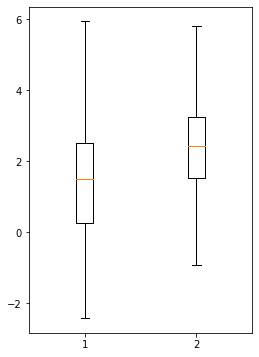

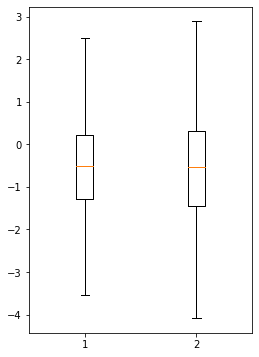

In [38]:
from functools import reduce
from scipy.stats import mannwhitneyu

hq_sldsc_dist = list(reduce(lambda x, y: x + y, list(map(lambda x: prefix_rt_sldsc_dic[x], samples_hq)), []))
lq_sldsc_dist = list(reduce(lambda x, y: x + y, list(map(lambda x: prefix_rt_sldsc_dic[x], samples_lq)), []))

plt.figure(figsize=(4, 6))
boxplot([lq_sldsc_dist, hq_sldsc_dist], showfliers=False)
plt.savefig("../output/Figure_S6A_l.pdf")

print(mannwhitneyu(lq_sldsc_dist, hq_sldsc_dist))

hq_sldsc_dist = list(reduce(lambda x, y: x + y, list(map(lambda x: prefix_nt_sldsc_dic[x], samples_hq)), []))
lq_sldsc_dist = list(reduce(lambda x, y: x + y, list(map(lambda x: prefix_nt_sldsc_dic[x], samples_lq)), []))

plt.figure(figsize=(4, 6))
boxplot([lq_sldsc_dist, hq_sldsc_dist], showfliers=False)
plt.savefig("../output/Figure_S6A_r.pdf")
from scipy.stats import mannwhitneyu
print(mannwhitneyu(lq_sldsc_dist, hq_sldsc_dist))

## Figure S6B
Histograms show differences in mean S-LDSC coefficients between high- and low-quality samples for relevant and non-relevant traits.

MannwhitneyuResult(statistic=1484.0, pvalue=1.9316858472493684e-13)


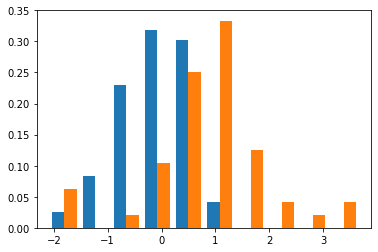

In [41]:
prefix_rt_sldsc_li = []
prefix_nt_sldsc_li = []

rt_sldsc_lq = []
rt_sldsc_hq = []
for index in traits:
    sumstat_file = gwas_df.loc[index]['ldsc_sumstat_file']
    stype_list = gwas_df.loc[index]['Comments and investigations'].split(',')
    pheno = index
    for stype in target_stypes:
        if stype in stype_list: target_li = prefix_rt_sldsc_li
        else: target_li = prefix_nt_sldsc_li
            
        samples = sample_dic[stype]
        hq_li = []
        lq_li = []
        for sample in samples:
            acc_bam = encode_df.loc[sample, "acc_bam"]
            # HOTSPOT2
            try:
                data_list1 = open("/home/ch218391/PROJECTS/ldsc_pipeline/analysis/ldsc_baseLD22.%s.%s.results" % (sample, sumstat_file)).readlines()[-1].split()
                heriz_hotspot_score = float(data_list1[9]) # z-score
            except:
                continue
            if sample in samples_hq:
                hq_li.append(heriz_hotspot_score)
            else:
                lq_li.append(heriz_hotspot_score)
        
        diff = np.mean(hq_li) - np.mean(lq_li)
        target_li.append(diff)
        if stype in stype_list:
            rt_sldsc_hq.append(np.mean(hq_li))
            rt_sldsc_lq.append(np.mean(lq_li))

def hist_norm_weight(inputs):
    weights = list(map(lambda x: np.ones_like(x) / float(len(x)), inputs))
    return weights

hist([prefix_nt_sldsc_li, prefix_rt_sldsc_li], weights=hist_norm_weight([prefix_nt_sldsc_li, prefix_rt_sldsc_li]))
plt.savefig("../output/Figure_S6B.pdf")
print(mannwhitneyu(prefix_nt_sldsc_li, prefix_rt_sldsc_li))

## Figure S6C
Two heatmaps comparing the average S-LDSC coefficients between high- and low-quality samples.

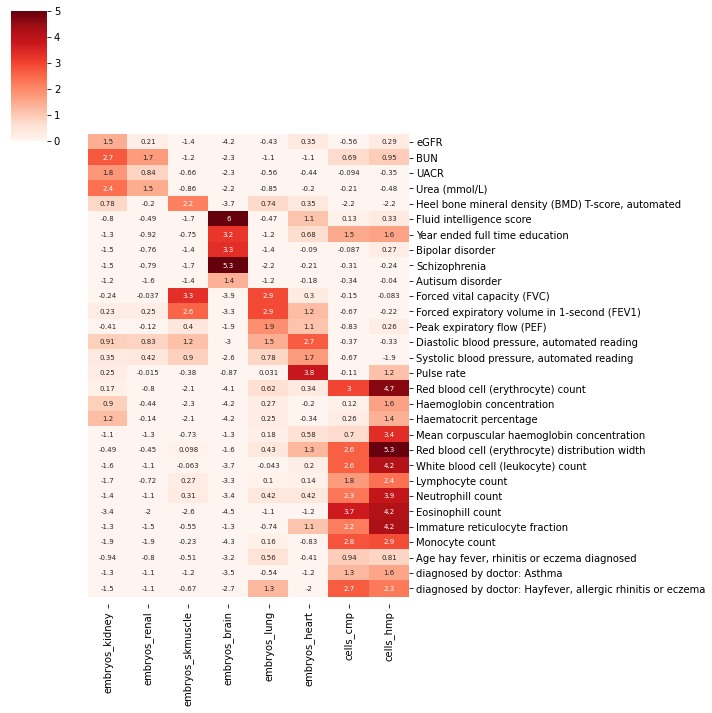

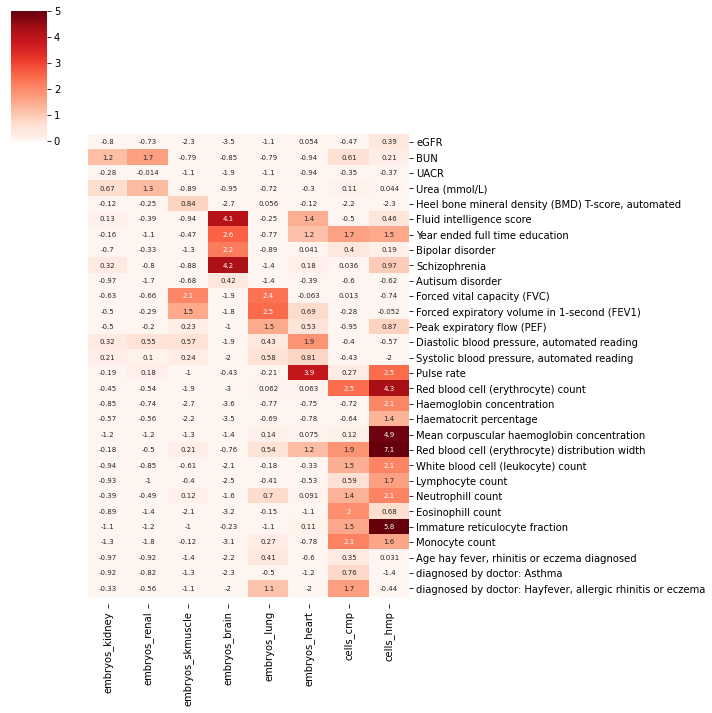

In [24]:
from textwrap import wrap
from scipy.stats import pearsonr

mat_u = []
mat_p = []
for index in traits_list:
    sumstat_file = gwas_df.loc[index]['ldsc_sumstat_file']
    stype_list = gwas_df.loc[index]['Comments and investigations'].split(',')
    pheno = index
    #if len(set.intersection(set(stype_list), set(target_stypes))) == 0:
    #    continue
    
    mat_u_sub = []
    mat_p_sub = []
    
    #print(pheno, end='\t')
    for stype in target_stypes:
        samples = sample_dic[stype]
        x_list = []
        y_list = []
        for sample in samples:
            acc_bam = encode_df.loc[sample, "acc_bam"]
            try:
                data_list1 = open("/home/ch218391/PROJECTS/ldsc_pipeline/analysis/ldsc_baseLD22.%s.%s.results" % (sample, sumstat_file)).readlines()[-1].split()
            except:
                continue
            
            # HOTSPOT2
            spot2_hotspot_score = prefix_spot2_dic[sample]
            enric_hotspot_score = float(data_list1[4]) # enrichment
            herit_hotspot_score = -1.0 * np.log10(float(data_list1[6])) # -log10P
            heriz_hotspot_score = float(data_list1[9]) # z-score
            
            x_list.append(spot2_hotspot_score)
            y_list.append(heriz_hotspot_score)

        
        #coff = 0.4
        xy_list = sorted(zip(x_list, y_list), key=lambda x: x[0])

        #xy_list_u = list(filter(lambda x: x[0] >= coff, xy_list))
        xy_list_u = list(xy_list)[int(len(xy_list)/2):]
        
        #xy_list_p = list(filter(lambda x: x[0] < coff, xy_list))
        xy_list_p = list(xy_list)[:int(len(xy_list)/2)]
        
        herit_avg_u = np.nanmean(list(map(lambda x: x[1], xy_list_u)))
        herit_avg_p = np.nanmean(list(map(lambda x: x[1], xy_list_p)))
        
        mat_u_sub.append(herit_avg_u)
        mat_p_sub.append(herit_avg_p)
        
    mat_u.append(mat_u_sub)
    mat_p.append(mat_p_sub)

corr_u = pd.DataFrame(np.matrix(mat_u), index=traits_list, columns=target_stypes)
r = sns.clustermap(corr_u, annot=True, cmap="Reds", annot_kws={"size": 7}, vmin=0, vmax=5.0, row_cluster=False, col_cluster=False)
b, t = r.ax_heatmap.get_ylim()
b += 0.5
t -= 0.5
dum = r.ax_heatmap.set_ylim(b, t)
#plt.show()
plt.savefig("../output/Figure_S7C_HQ.pdf")

corr_p = pd.DataFrame(np.matrix(mat_p), index=traits_list, columns=target_stypes)
r = sns.clustermap(corr_p, annot=True, cmap="Reds", annot_kws={"size": 7}, vmin=0, vmax=5.0, row_cluster=False, col_cluster=False)
b, t = r.ax_heatmap.get_ylim()
b += 0.5
t -= 0.5
dum = r.ax_heatmap.set_ylim(b, t)
#plt.show()
plt.savefig("../output/Figure_S7C_LQ.pdf")